### Árbol de Decisión modelo de Clasificación en Scikit-Learn - Titanic

In [22]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv("Titanic.csv", sep = ",")

In [24]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [25]:
#Separación en Train y Test
X = titanic.drop("Survived", axis=1)
y = titanic.Survived

In [26]:
from sklearn.model_selection import train_test_split 
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [28]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier
 #instanciamos el modelo
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42) 

In [29]:
#Fit
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=4, random_state=42)

In [30]:
#Prediccion
y_test_pred = arbol_de_decision.predict(X_test)

In [31]:
y_test_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [32]:
y_test

120    0
329    1
39     1
294    1
654    0
      ..
534    0
393    0
382    1
223    0
140    0
Name: Survived, Length: 215, dtype: int64

A lo largo de este notebook, se solicita calcular las métricas requeridas como así también su correspondiente interpretación: 

1. Calcular la métrica Accuracy.

In [33]:
###Completar
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7674418604651163

2. Crear la Matriz de Confusión

In [35]:
###Completar
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_pred, y_test) 

array([[102,  26],
       [ 24,  63]])

3. Calcular la métrica Precision

In [36]:
###Completar
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred) 

0.7241379310344828

4. Calcular la métrica Recall

In [37]:
###Completar
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred) 

0.7078651685393258

5. Calcular la métrica F1 score

In [38]:
###Completar
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred) 

0.7159090909090908

6. classification_report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       126
           1       0.72      0.71      0.72        89

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



6. Calcular y plotear la Curva ROC

In [40]:
###Completar
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
y_score1

array([0.03797468, 1.        , 0.91666667, 0.98360656, 0.03797468,
       0.1474359 , 0.15789474, 0.91666667, 0.15789474, 0.66666667,
       0.98360656, 0.91666667, 0.54285714, 0.03797468, 0.98360656,
       0.1474359 , 0.1474359 , 0.98360656, 0.1474359 , 0.98360656,
       0.16666667, 0.91666667, 0.66666667, 0.54285714, 0.1474359 ,
       0.1474359 , 0.1474359 , 0.1474359 , 0.66666667, 0.03797468,
       0.66666667, 0.66666667, 0.54285714, 0.03797468, 0.03797468,
       0.15789474, 0.03797468, 0.21621622, 0.21621622, 0.03797468,
       0.1474359 , 0.1474359 , 0.98360656, 0.03797468, 0.21621622,
       0.91666667, 0.91666667, 0.66666667, 0.54285714, 0.98360656,
       0.54285714, 0.91666667, 0.54285714, 0.1474359 , 0.1474359 ,
       0.91666667, 0.54285714, 0.        , 0.1474359 , 0.03797468,
       0.98360656, 0.1474359 , 0.91666667, 0.1474359 , 0.1474359 ,
       0.21621622, 0.1474359 , 0.98360656, 0.1474359 , 0.54285714,
       0.1474359 , 0.98360656, 0.1474359 , 0.1474359 , 0.03797

In [41]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [44]:
true_positive_rate1

array([0.        , 0.02247191, 0.26966292, 0.52808989, 0.70786517,
       0.75280899, 0.76404494, 0.82022472, 0.95505618, 0.98876404,
       1.        ])

In [45]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.8243267344390939


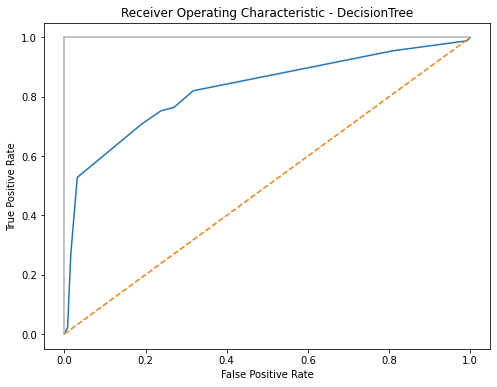

In [46]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()